# Housing data

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# df = pd.read_excel("./data/housing_data.xlsx")
url = 'https://raw.githubusercontent.com/nnnpooh/ai-class-2565-1/main/Topic%2009%20-%20ANN/data/housing_data.csv'
df = pd.read_csv(url)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=0, xmax=1, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)

In [3]:
# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Very important to scale both X and y data.

Text(0, 0.5, 'MEDV (Scaled)')

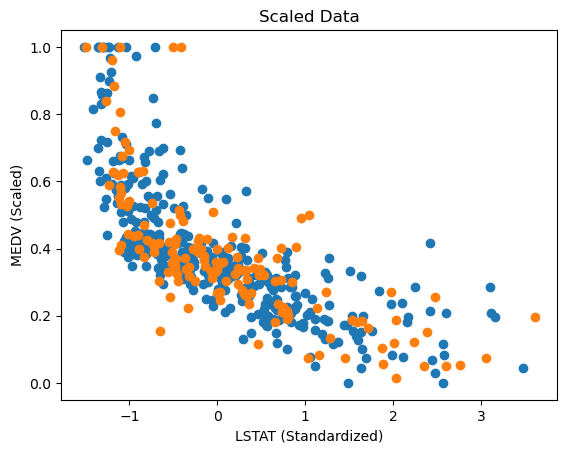

In [4]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Scale y data
nm = MinMaxScaler()
y_train = y_train.reshape(-1, 1) # Required for sklearn api
y_test = y_test.reshape(-1, 1)
nm.fit(y_train)
y_train_scaled = nm.transform(y_train)
y_test_scaled = nm.transform(y_test)

# Plot data to validate
fig, ax = plt.subplots(1, 1)
ax.scatter(X_train_std, y_train_scaled)
ax.scatter(X_test_std, y_test_scaled)
ax.set_title('Scaled Data')
ax.set_xlabel('LSTAT (Standardized)')
ax.set_ylabel('MEDV (Scaled)')

In [5]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(units=16, activation='relu', name='hidden1'),
    tf.keras.layers.Dense(units=1, name='output')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                32        
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [6]:
tf_fit = model.fit(x=X_train_std, y=y_train_scaled,
        batch_size=16,
        validation_split=0.1,
        epochs=100, 
        verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 20ms/step - loss: 0.2728 - mean_absolute_percentage_error: 2726441.2500 - val_loss: 0.1820 - val_mean_absolute_percentage_error: 115.1077
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1646 - mean_absolute_percentage_error: 752214.1250 - val_loss: 0.1148 - val_mean_absolute_percentage_error: 70.2600
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1108 - mean_absolute_percentage_error: 639629.5625 - val_loss: 0.0773 - val_mean_absolute_percentage_error: 63.6741
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0805 - mean_absolute_percentage_error: 1430263.6250 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 57.7147
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0600 - mean_absolute_percentage_error: 1426457.7500 - val_loss: 0.0360 - val_mean_absolute_percentage_error: 47.9874
Epoch 6/100
20/20 [=====================

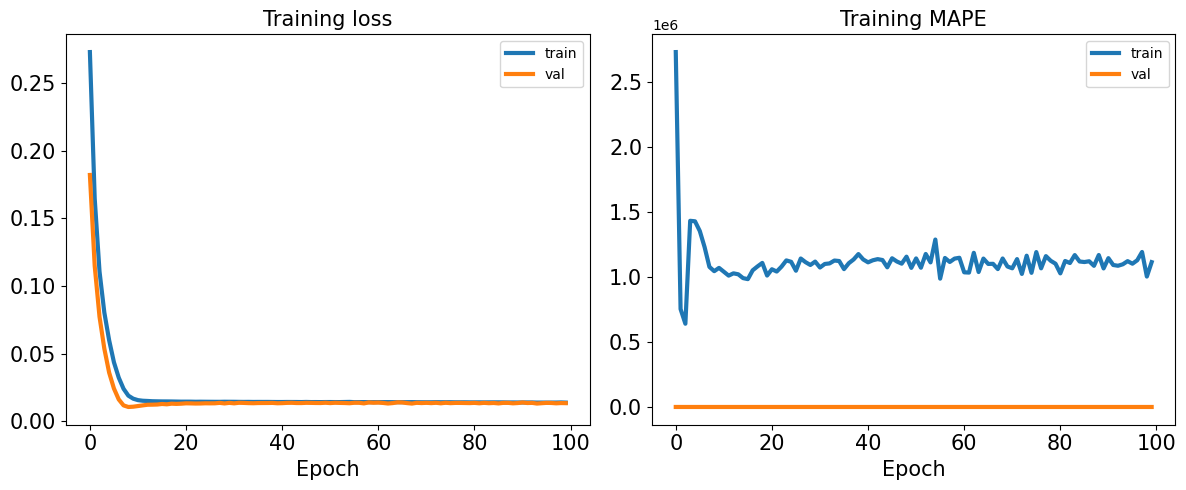

In [7]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['mean_absolute_percentage_error'], lw=3)
ax.plot(hist['val_mean_absolute_percentage_error'], lw=3)
ax.set_title('Training MAPE', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

In [8]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

5/5 [==============================] - 0s 2ms/step


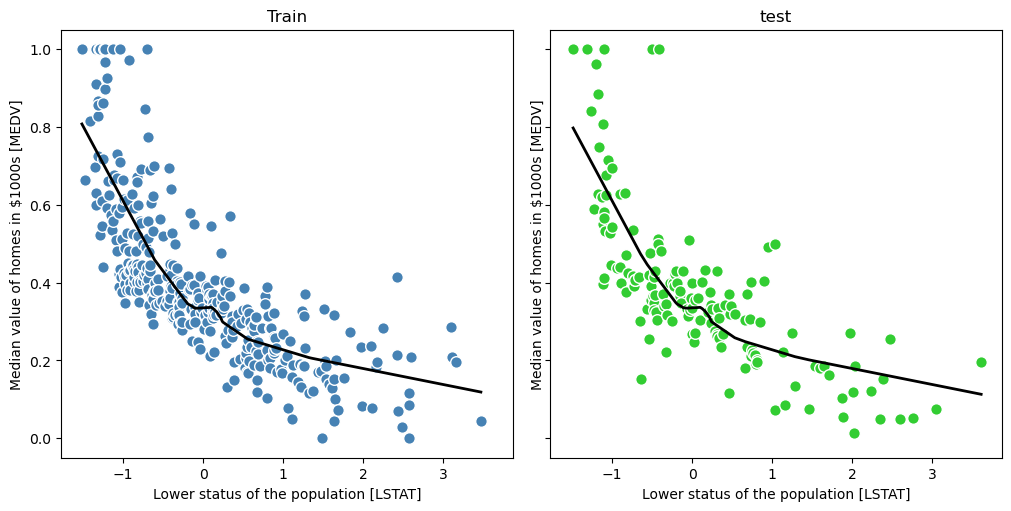

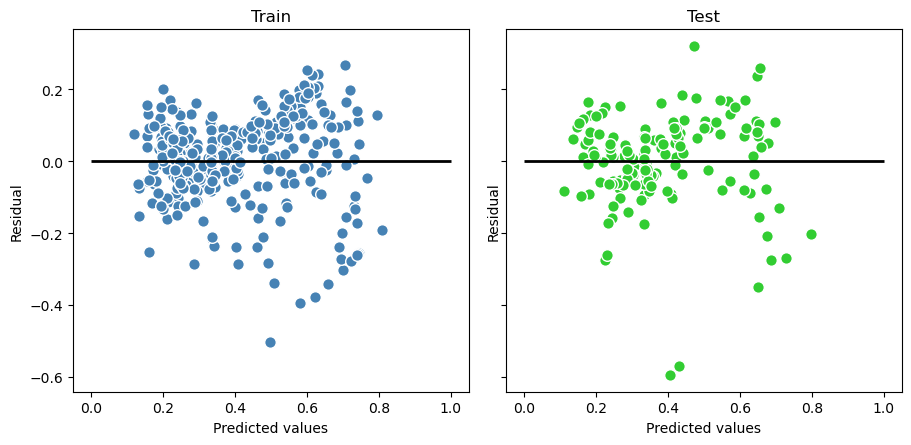

In [10]:
# Indices for sorting during plotting
idx_train = np.argsort(X_train_std, axis=0).ravel()
idx_test = np.argsort(X_test_std, axis=0).ravel()

fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
)
reg_plot(
    ax=ax[0],
    X=X_train_std[idx_train, :1],
    y=y_train_scaled[idx_train],
    y_pred=y_train_pred[idx_train],
    title="Train",
)
reg_plot(
    ax=ax[1],
    X=X_test_std[idx_test, :1],
    y=y_test_scaled[idx_test],
    y_pred=y_test_pred[idx_test],
    title="test",
    color="limegreen",
)
ax[0].set_xlabel("Lower status of the population [LSTAT]")
ax[0].set_ylabel("Median value of homes in $1000s [MEDV]")
ax[1].set_xlabel("Lower status of the population [LSTAT]")
ax[1].set_ylabel("Median value of homes in $1000s [MEDV]")

fig, ax = plt.subplots(
    1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
)
res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train_scaled, title="Train")
res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test_scaled, title="Test", color="limegreen")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residual")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("Residual")

df = store_results(
    df=pd.DataFrame(),
    model_name='ANN',
    y_train=y_train_scaled,
    y_train_pred=y_train_pred,
    y_test=y_test_scaled,
    y_test_pred=y_test_pred,
)

In [ ]:
display(df)

,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,ANN,0.013575,0.015509,0.675695,0.622825
